[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/13-Matrices-Arrays-and-Lists.ipynb)






# <a name="13-title"><font size="6">Module 13: Matrices, Arrays and Lists</font></a>

---

# <a name="intro">Introduction</a>

---

We have been working with data that has mostly been stored in data frames and vectors. Recall from an [earlier module](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/02-Fundamentals-of-Working-with-Data.ipynb):

- Vectors are one-dimensional objects of a single data type.
- Data frames are two dimensional objects where each column can be a different data type.

In this module we will cover matrices, arrays, and lists which are additional data structures available in R. These data
structures are fundamental to performing data analysis in R,
particularly if we need to program our own methods. In fact, matrices are perhaps the most powerful object used throughout most mathematical and statistical fields of study.

Understanding how to use matrices is foundational knowledge for any data
scientist.

-   Matrices are a simple, efficient way of storing many kinds of data.
-   Matrix algebra is the most basic way of manipulating data
    represented in matrix format.

Numeric matrices are often needed to implement complex algorithms used
for data science methods related to regression, optimization, and
classification.


## <a name="pack">Installing and Loading Required Packages</a>

---


We start by making sure the necessary R packages are installed.


In [1]:
# install packages required later in this module
install.packages(c("microbenchmark","abind"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# load required packages
library(tidyverse)
library(microbenchmark)
library(abind)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# <a name="what-is-matrix">What is a Matrix?</a>

---


A <font color="dodgerblue">**matrix**</font> is a two-dimensional object whose values are all the same data type.

-   We can have numeric, character, or logical matrices, but *only one data type* can exist at a time in a matrix.

The size of a matrix $\mathbf{A}$ are determined first by the number of rows followed by the number of columns. If  $\mathbf{A}$ has $m$ rows and $n$ columns, then we say $\mathbf{A}$ is an $m \times n$ matrix.

$$
\mathbf{A} = \begin{bmatrix}
\mathbf{A}_{1,1} & \mathbf{A}_{1,2} & \cdots & \mathbf{A}_{1,n} \\
\mathbf{A}_{2,1} & \mathbf{A}_{2,2} & \cdots & \mathbf{A}_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{A}_{m,1} & \mathbf{A}_{m,2} & \cdots & \mathbf{A}_{m,n} \\
\end{bmatrix},
$$

where $\mathbf{A}_{i,j}$ denotes the element in row $i$ and column $j$
of matrix $\mathbf{A}$. Note we also describe the location of an element by first indicating the row and then the column.

A <font color="dodgerblue">**column vector**</font> is a matrix with a single column. A <font color="dodgerblue">**row vector**</font> is a matrix with a single row.

-   Vectors are commonly denoted with bold lowercase letters such as $\mathbf{a}$ or $\mathbf{b}$, but this may be simplified to lowercase letters such as $a$ or $b$.
  - The notation $\vec{a}$ or $\vec{b}$ is also often used to denote vectors.

A $p\times 1$ column vector $\mathbf{a}$ and a $1 \times p$ row vector $\mathbf{b}$ may constructed respectively as

$$
\mathbf{a} =
\begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_p
\end{bmatrix}  \quad \text{and} \quad
\mathbf{b} = \begin{bmatrix}b_1 & b_2 & \ldots & b_p \end{bmatrix}.
$$


For our purposes, we will mostly be working with column vectors, thus,  unless stated otherwise, **we assume "vectors" in this module are column vectors**. For the sake of spacing, we may sometimes express a column vector as entries separated by commas arranged in a row.  Vector $\mathbf{a}$ may therefore be typed as

$$\mathbf{a} = [a_1, a_2, \ldots, a_p] \qquad \text{instead of} \qquad \mathbf{a} = \begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_p
\end{bmatrix}.$$






# <a name="create-matrix">Creating a Matrix</a>

---

A matrix can be created in R by passing a vector to the `matrix`
function and specifying the number of rows and columns the matrix will
have.

-   The values of the vector will be placed into the matrix one column at a time.
-   The `nrow` argument specifies the number of rows.
-   The `ncol` argument specifies the number of columns.

Let's create a $5\times 2$ matrix with the elements $1, 2, \ldots, 5$ in the first column and $6, 7, \ldots, 10$ in the second column.

In [3]:
# by default values are first arranged down column 1, then column 2, and so on
A <- matrix(1:10, nrow = 5, ncol = 2)
A

1,6
2,7
3,8
4,9
5,10


In [4]:
print(A)

     [,1] [,2]
[1,]    1    6
[2,]    2    7
[3,]    3    8
[4,]    4    9
[5,]    5   10


If we change the `byrow` argument of the `matrix` function to `TRUE`,
then the values will be placed row by row, as in the example below.

In [5]:
# byrow = TRUE arranges first across row 1, then row 2, and so on
matrix(1:6, nrow = 2, ncol = 3, byrow = TRUE)

1,2,3
4,5,6


## <a name="quest1">Question 1</a>

---

Create the matrix

$$\mathbf{M} = \begin{bmatrix}
2 & 4 & 6 & 8 & 10 \\
12 & 14 & 16 & 18 & 20 \\
22 & 24 & 26 & 28 & 30
\end{bmatrix}.$$

In [ ]:
# enter code to define and store matrix M
M <- ??
print(M)

## <a name="bind">Row and Column-Binding Functions</a>

---


The following `base` R functions can be used to combine (or bind) vectors together to construct a matrix:

- The `cbind()` function binds vectors together as columns.
- The `rbind()` function binds vectors together as rows.

In the example below, we combine the vectors \[1, 2, 3, 4\] and \[5, 6,
7, 8\] columnwise to create a matrix.

In [6]:
# vectors are one-dimensional
vec1 <- 1:4
vec2 <- 5:8

In [7]:
# column 1 is vec1 and column 2 is vec2
cbind(vec1, vec2)

vec1,vec2
1,5
2,6
3,7
4,8


Alternatively, we can use the `rbind` function to create a matrix by
combining the vectors row by row.

In [8]:
# row 1 is vec1 and row 2 is vec2
rbind(vec1, vec2) |> print()

     [,1] [,2] [,3] [,4]
vec1    1    2    3    4
vec2    5    6    7    8


## <a name="dim">Finding the Size of a Matrix

---

The `dim()` function returns a vector that gives the number of rows and columns of a matrix.

In [9]:
dim(A)  # a has 5 rows and 2 columns

[1] 5 2

In [10]:
dim(vec1)  # a vector is not a matrix

NULL

In [11]:
# return number of rows, first element in dim(A)
dim(A)[1]

[1] 5

In [12]:
# return number of columns, second element in dim(A)
dim(A)[2]

[1] 2

The `nrow` and `ncol` functions can be used to determine the number of
rows and columns, respectively, in a `matrix` object.

In [13]:
nrow(A)  # same output as dim(A)[1]

[1] 5

In [14]:
ncol(A)  # same output as dim(A)[2]

[1] 2

## <a name="square">Square Matrices</a>

---

A matrix is <font color="dodgerblue">**square**</font> if the number of rows equals the number of
columns.

- The <font color="dodgerblue">**diagonal entries**</font> of an $n\times n$ square matrix $\mathbf{A}$
are the elements $\mathbf{A}_{i,i}$ for $i = 1, 2, \ldots, n$.

- Non-diagonal elements of $\mathbf{A}$ are called off-diagonal elements.



## <a name="identity">Identity Matrix</a>

---

The $n\times n$ <font color="dodgerblue">**identity matrix**</font>, $\mathbf{I}_{n}$, is a
matrix for which the diagonal elements are all 1 and the non-diagonal
elements are all 0.

-   Context often makes it clear what the dimensions of an identity matrix are, so the notation for $\mathbf{I}_{n}$ is often simplified to $\mathbf{I}$.

The syntax `diag(n)` will create an $n\times n$ identity matrix in R.

We create a $3\times 3$ identify matrix below.

In [15]:
# creating the 3 x 3 identify matrix
diag(3)

1,0,0
0,1,0
0,0,1


# <a name="subset-mat">Indexing and Subsetting a Matrix</a>

---


If `A` is a matrix, then we can select the subset of `A` using the
syntax `A[r, c]`, where `r` and `c` are `numeric` vectors indicating the indices of the desired rows and columns, respectively, that we want to select.

To subset a matrix, we can use the same index syntax as with data frames:

-   If we don't supply a vector of indices for the row or column, then all rows or all columns will be returned.
-   We can use the `-` notation to select all but the specified rows or columns. T
-   If we select a single row or column, then the subsetted object will simplify to a `vector` object instead of a `matrix`.


This is easiest to understand by walking through a set of examples.


## <a name="quest2">Question 2</a>

---

Use the code cell below to enter the matrix

$$\mathbf{B} = \begin{bmatrix} 1 & 5 & 9 \\ 2 & 6 & 10 \\ 3 & 7 & 11 \\ 4 & 8 & 12 \end{bmatrix}.$$

Then answer the questions that follow.

In [17]:
# enter matrix B
B <-  matrix(1:12, ncol = 3)
print(B)

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


### <a name="quest2a">Question 2a</a>

---

Select columns 2 and 3 of `B`.

### <a name="quest2b">Question 2b</a>

---

Select rows 1 and 4 of `B`.

### <a name="quest2c">Question 2c</a>

---


Select columns 2 and 3 of rows 1 and 4 of `B`.

### <a name="quest2d">Question 2d</a>

---

Select all columns of `B` except the third.

### <a name="quest2e">Question 2e</a>

---

Create a vector by selecting the second row of `B`.

### <a name="quest2f">Question 2f</a>

---

Create a vector by selecting the second column of `B`.

## <a name="quest2g">Using the `drop` Argument</a>

---

If we want to retain the `matrix` structure of `B` when we select a
single row or column, then we set the optional `drop` argument to
`FALSE` after the column argument.

- This to signifies we do NOT want to drop the matrix structure when creating the output.
- By default, indexing uses `drop = TRUE` when no `drop` argument is specified.

In [18]:
B[2, , drop = FALSE]  # stores row 2 as a row vector with dim 1 times 3

2,6,10


In [19]:
B[, 2, drop = FALSE]  # stores column 2 as a column vector with dim 4 times 1

5
6
7
8


## <a name="extract-ele">Extracting Elements of a Matrix</a>

---

If we want to extract specific elements of a `matrix` object, then we can use a `matrix` indicating the elements we want to extract inside square brackets `[ ]`.

Let’s say we want to extract the elements in positions $(1, 2)$,
$(3, 1)$, and $(4, 3)$. We create a matrix describing those positions.

- Each row of the matrix describes an element we want to extract.
- Column 1 gives the row index of each element.
- Column 2 gives the column index of each element.

In [20]:
pos <- cbind(c(1, 3, 4),  # row index of each element
             c(2, 1, 3))  # corresponding column index of each element
pos

1,2
3,1
4,3


We use `pos` to extract those elements from `B`. Note the elements in the output are stored in a vector.

In [21]:
B[pos]

[1]  5  3 12

# <a name="operations">Matrix Operations</a>

---

As with numbers (scalars), we can define operations such as addition and multiplication of two matrices.


## <a name="add">Addition and Subtraction</a>

---

We can add or subtract the elements of two matrices **as long as they have the same size**.

We create two $2 \times 3$ matrices below.

In [22]:
A <- matrix(1:6, nrow = 2, ncol = 3, byrow = TRUE)
A

1,2,3
4,5,6


In [23]:
B <- matrix(c(2, 1, 9, 3, 1, 1), nrow = 2, ncol = 3)
B

2,9,1
1,3,1


We can add the two matrices below using the `+` operator. The result is
simply the sum of the values in the same position of the matrices.

In [24]:
A + B

3,11,4
5,8,7


In [25]:
# subtraction works in the same way
A - B

-1,-7,2
3,2,5


In [26]:
# creating a different sized matrix
C <- matrix(1:12, nrow = 3, ncol = 4)
C

1,4,7,10
2,5,8,11
3,6,9,12


In [27]:
# we cannot add matrices with different sizes
A + C

ERROR: Error in A + C: non-conformable arrays


## <a name="scalar-matrix-mult">Multiplying a Matrix by a Scalar</a>

---

A <font color="dodgerblue">**scalar**</font> is a number. For example $2$, $-5$, and $\sqrt{17}$ are all scalar values. We define multiplication of a matrix $\mathbf{A}$ by a scalar value $c \in\mathbb{R}$ as multiplying each element in $\mathbf{A}$ by $c$.

To perform scalar multiplication in R, we simply use the `*` operator to multiply the matrix by the scalar value.


## <a name="quest3">Question 3</a>

---

Run the first code cell below to create matrix $\mathbf{A}$. Without using R, determine the elements of matrix $2\mathbf{A}$. Then run the second code cell to check your answer.


In [28]:
A <- matrix(1:6, nrow = 2, ncol = 3, byrow = TRUE)
A

1,2,3
4,5,6


### <a name="sol3">Solution to Question 3</a>


---

We have

$$2 \mathbf{A} = \begin{bmatrix}
?? & ?? & ?? \\
?? & ?? & ??
\end{bmatrix}.$$


In [ ]:
# run to check your work


## <a name="matrix-mult">Matrix Multiplication</a>

---


Consider the two matrices

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix} \quad \text{and} \quad
\mathbf{B} = \begin{bmatrix}
1 & 4\\
2 & 5\\
3 & 6
\end{bmatrix}$$

We define the product of $\mathbf{A}$ and $\mathbf{B}$ in less intuitive way.

- The element in row 1 and column 1 of $AB$ is the sum of the product of elements in row 1 of matrix $\mathbf{A}$ and column 1 of $\mathbf{B}$.
  - Row 1 of $\mathbf{A}$ is $\lbrack 1, 2, 3 \rbrack$.
  - Column 1 of $\mathbf{B}$ is $\lbrack 1, 2, 3 \rbrack$.

$$(\mathbf{AB})_{1,1} = 1\cdot 1 +  2 \cdot 2 + 3 \cdot 3 = 14$$


- The element in row 1 and column 2 of $AB$ is the sum of the product of elements in row 1 of matrix $\mathbf{A}$ and column 2 of $\mathbf{B}$.
  - Row 1 of $\mathbf{A}$ is $\lbrack 1, 2, 3 \rbrack$.
  - Column 2 of $\mathbf{B}$ is $\lbrack 4, 5, 6 \rbrack$.

$$(\mathbf{AB})_{1,2} = 1\cdot 4 +  2 \cdot 5 + 3 \cdot 6 = 32$$

- In general, $(\mathbf{AB})_{i,j}$ is the sum of the product of entries in row $i$ of $\mathbf{A}$ and column $j$ of $\mathbf{B}$.



$$
AB=\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
1 & 4\\
2 & 5\\
3 & 6
\end{bmatrix} =
\begin{bmatrix}
1\cdot 1 +  2 \cdot 2 + 3 \cdot 3 & 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6\\
4\cdot 1 +  5 \cdot 2 + 6 \cdot 3 & 4 \cdot 4 + 5 \cdot 5 + 6 \cdot 6\\
\end{bmatrix} =
\begin{bmatrix}
14 & 32\\
32 & 77\\
\end{bmatrix}.
$$

- The result of multiplying a ${\color{tomato}{2}} \times {\color{dodgerblue}{3}}$ matrix $\mathbf{A}$ and a ${\color{dodgerblue}{3}} \times {\color{green}{2}}$ matrix $\mathbf{B}$ results in a ${\color{tomato}{2}} \times {\color{green}{2}}$ matrix $AB$.

More generally, let $\mathbf{A}$ be a ${\color{tomato}{m}} \times {\color{dodgerblue}{n}}$ matrix and $\mathbf{B}$ an
${\color{dodgerblue}{n}} \times {\color{green}{p}}$ matrix. The product $\mathbf{AB}$ will be an ${\color{tomato}{m}} \times {\color{green}{p}}$ matrix. To compute the value of $(\mathbf{AB})_{i,j}$, we take the sum of the product of entries in row $i$ of $\mathbf{A}$ and column $j$ of $\mathbf{B}$. We can express this using summation notation as

$$
(\mathbf{AB})_{i,j} = \sum_{k=1}^{n} \mathbf{A}_{i,k}\mathbf{B}_{k,j}.
$$

- **The matrix product
$\mathbf{AB}$ is only defined if the number of columns in $\mathbf{A}$
matches the number of rows in $\mathbf{B}$.**



### <a name="matrix-mult-r">Matrix Multiplication in R</a>

---

We multiply two matrices of the correct size using the `%*%` operator.


- Do **NOT** use `*` to perform matrix multiplication (more on that later).


## <a name="quest4">Question 4</a>

---

Consider the three matrices

$$\mathbf{A} = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}, \quad \mathbf{B} = \begin{bmatrix}
1 & 4 & 7 & 10 & 13 \\
2 & 5 & 8 & 11 & 14 \\
3 & 6 & 9 & 12 & 15 \end{bmatrix} \quad
\text{and} \quad \mathbf{C} = \begin{bmatrix}
2 & 3 & 4 \\
5 & 6 & 7 \end{bmatrix}.$$

### <a name="quest4a">Question 4a</a>

---

Use code cells below to store the matrices $\mathbf{A}$, $\mathbf{B}$, and $\mathbf{C}$ to matrix objects `A`, `B`, and `C`, respectively.


In [ ]:
# enter matrix A


In [ ]:
# enter matrix B


In [ ]:
# enter matrix C


### <a name="quest4b">Question 4b</a>

---

Is it possible to compute the product $\mathbf{AB}$? If yes, give the dimensions of $\mathbf{AB}$. If not, explain why not. Then check your answer by entering code to compute the product $\mathbf{AB}$.


#### <a name="sol4b">Solution to Question 4b</a>

---


<br>  
<br>

In [ ]:
# check your answer


### <a name="quest4c">Question 4c</a>

---

Is it possible to compute the product $\mathbf{AC}$? If yes, give the dimensions of $\mathbf{AC}$. If not, explain why not. Then check your answer by entering code to compute the product $\mathbf{AC}$.


#### <a name="sol4c">Solution to Question 4c</a>

---


<br>  
<br>


In [ ]:
# check your answer


### <a name="quest4d">Question 4d</a>

---

Is it possible to compute the product $\mathbf{BA}$? If yes, give the dimensions of $\mathbf{BA}$. If not, explain why not. Then check your answer by entering code to compute the product $\mathbf{BA}$.


#### <a name="sol4d">Solution to Question 4d</a>

---


<br>  
<br>


In [ ]:
# check your answer


### <a name="quest4e">Question 4e</a>

---

Run the code cell below to execute the command `A * C`. Explain what calculations have been applied to obtain the output.

- <font color="tomato">**Note: This is NOT how matrix multiplication is defined!**</font>
- Always use `%*%` for matrix multiplication.


In [ ]:
# this is NOT how to perform matrix multiplication
A * C

#### <a name="sol4e">Solution to Question 4e</a>

---


<br>  
<br>


## <a name="element-mult">Elementwise Matrix Multiplication</a>

---

Consider two matrices $\mathbf{A}$ and $\mathbf{B}$ that have the same
dimensions. The elementwise product, denoted
$\mathbf{A} \circ \mathbf{B}$ is the product of the elements in the same
position of the matrix.

Assume $\mathbf{A}$ and $\mathbf{B}$ are $n\times m$ matrices.
$\mathbf{A} \circ \mathbf{B}$ will be an $n\times m$ matrix and $$
(\mathbf{A} \circ \mathbf{B})_{i,j} = \mathbf{A}_{i,j}\mathbf{B}_{i,j}.
$$

We perform elementwise multiplication of the two matrices below.

$$
\begin{bmatrix}
1 & 4\\
2 & 5\\
3 & 6
\end{bmatrix} \circ
\begin{bmatrix}
7 & 10\\
8 & 11\\
9 & 12
\end{bmatrix}=
\begin{bmatrix}
1 \cdot 7 & 4 \cdot 10\\
2 \cdot 8 & 5 \cdot 11\\
3 \cdot 9 & 6 \cdot 12
\end{bmatrix}=
\begin{bmatrix}
7 & 40\\
16 & 55\\
27 & 72
\end{bmatrix}.
$$

We perform elementwise multiplication of two matrices of the correct
size using the `*` operator. Let’s multiply these same matrices using R

In [29]:
A <- matrix(1:6, ncol = 2)
A

1,4
2,5
3,6


In [30]:
B <- matrix(7:12, ncol = 2)
B

7,10
8,11
9,12


In [31]:
A * B

7,40
16,55
27,72


## <a name="transpose">Transpose of a Matrix</a>

---

The <font color="dodgerblue">**transpose**</font> of a matrix $\mathbf{A}$, denoted ${\color{dodgerblue}{\mathbf{A}^T}}$,
exchanges the rows and columns of the matrix. More formally, the $i,j$
element of $\mathbf{A}^T$ is the $j,i$ element of $\mathbf{A}$, i.e.,
$(\mathbf{A}^T)_{i,j} = \mathbf{A}_{j,i}$.

- If $\mathbf{A}$ is an $m \times n$ matrix, then $\mathbf{A}^T$ is an $n \times m$ matrix.

We can use the `t()` function from `base` R to obtain the transpose of a matrix.

In [32]:
A  # matrix A from previous code

1,4
2,5
3,6


In [33]:
t(A)  # transpose of A

1,2,3
4,5,6


## <a name="inverse">Finding an Inverse Matrix</a>

---

An $n\times n$ square matrix $\mathbf{A}$ is <font color="dodgerblue">**invertible**</font> if there exists an $n\times n$ matrix $\mathbf{B}$ such that $\mathbf{AB}=\mathbf{BA}=\mathbf{I}_{n}$. The inverse of $\mathbf{A}$ is denoted ${\color{dodgerblue}{\mathbf{A}^{-1}}}$.

-   Inverse matrices only exist for square matrices.
-   The notation $\mathbf{A}^{-1}$ does NOT mean $\frac{1}{\mathbf{A}}$ since dividing by a matrix is not a possible operation.



The `solve(A, B)` function is a `base` R function that solves the matrix equation $\mathbf{A} \mathbf{X} = \mathbf{B}$ where $\mathbf{A}$, $\mathbf{X}$ and $\mathbf{B}$ are matrices or vectors with appropriate dimensions.

For an $n \times n$ square matrix $\mathbf{A}$, the command `solve(A)` assumes $\mathbf{B} = \mathbf{I}_n$, and solves the matrix equation $\mathbf{A} \mathbf{X} = \mathbf{I}_n$.

- The command `solve(A)` can be used to compute the inverse of a matrix.
- This can cause numeric issues and there are other packages that have other built-in functions.



## <a name="quest5">Question 5</a>

---

Compute the inverse of the matrix

$$\mathbf{A} = \begin{bmatrix}
2 & 3 & 2 \\
1 & 0 & 3 \\
2 & 2 & 3
\end{bmatrix}.$$

Then check to make sure the result is accurate.

### <a name="sol5">Solution to Question 5</a>

---


In [39]:
# enter matrix A
A <- matrix(c(2, 3, 2,
              1, 0, 3,
              2, 2, 3),
            nrow = 3)
A

2,1,2
3,0,2
2,3,3


In [ ]:
# compute inverse of A


In [ ]:
# check the result


In [ ]:
# check the result


## <a name="inverse">A Library of Other Common Operations</a>

---

Let $\mathbf{A}$ denote a square, $n \times n$ matrix.

- `det(A)` computes the determinant of $\mathbf{A}$.
- `sum(diag(A))` computes the trace of of $\mathbf{A}$.
- `eigen(A)` finds eigenvalues and eigenvectors of $\mathbf{A}$.


In [40]:
print(A)

     [,1] [,2] [,3]
[1,]    2    1    2
[2,]    3    0    2
[3,]    2    3    3


In [41]:
det(A)

[1] 1

In [42]:
sum(diag(A))  # sum of the diagonal elements

[1] 5

In [43]:
ev <- eigen(A)
print(ev)

eigen() decomposition
$values
[1]  6.1622777 -1.0000000 -0.1622777

$vectors
           [,1]       [,2]       [,3]
[1,] -0.4714045 -0.1849001 -0.4714045
[2,] -0.4714045 -0.7396003 -0.4714045
[3,] -0.7453560  0.6471502  0.7453560



In [44]:
# we can use the eigenvectors to diagonalize A
P <- ev$vectors
solve(P) %*% A %*% P

6.162278e+00,6.489234e-16,6.334949e-16
-1.247480e-16,-1.000000e+00,-6.060353e-16
-1.999256e-15,2.621106e-16,-1.622777e-01


## <a name="solve-sys">Solving Linear Systems of Equations</a>

---

We can use the `solve()` function to solve linear systems of equations of the form:

$$\begin{align*}
a_{11} x_1 + a_{12} x_2 + \ldots a_{1n} x_n &= b_1\\
a_{21} x_1 + a_{22} x_2 + \ldots a_{2n} x_n &= b_2\\
& \vdots  \\
a_{m1} x_1 + a_{m2} x_2 + \ldots a_{mn} x_n &= b_m
\end{align*}
$$

which we can express equivalently as the matrix equation

$$\begin{bmatrix}
a_{11} & a_{12} & \ldots & a_{1n} \\
a_{21} & a_{22} & \ldots & a_{2n} \\
& & \vdots & \\
a_{m1} & a_{m2} & \ldots & a_{mn}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix} = \begin{bmatrix}
b_1 \\ b_2 \\ \vdots \\ b_m
\end{bmatrix}
\quad \text{or} \quad
\mathbf{A} \mathbf{x} = \mathbf{b}
$$

We can solve a general linear systems of equations with the command `solve(A, b)`.

If we have the same number of equations as variables, then matrix of coefficients $\mathbf{A}$ will be a square matrix. We can solve the equation $\mathbf{A} \mathbf{x} = \mathbf{b}$ using inverse matrices. If $\mathbf{A}$ is an invertible matrix, then:

- We can multiply both sides of the equation by by $\mathbf{A}^{-1}$ on the left.

$$\mathbf{A}^{-1}\mathbf{A} \mathbf{x} = \mathbf{A}^{-1} \mathbf{b} \quad \text{giving the solution} \quad \mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$$



### <a name="compare">Comparing Methods for Solving Linear Systems</a>

---

Consider the linear system of equations

$$\begin{align*}
2x_1 + 3x_2 + 2x &= x\\
x_1 + 3x_3 &= x\\
2x_1 + 2x_2 + 3x_3 &=x
\end{align*}$$

We can express this system using the matrix equation

$$\begin{bmatrix}
2 & 3 & 2 \\
1 & 0 & 3 \\
2 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} =
\begin{bmatrix}
2 \\ -5 \\ 8
\end{bmatrix}.$$

In the example below, we use `solve()` and inverse matrices to solve a linear system of equations.

In [45]:
# vector b is treated as a 3 x 1 column vector
b <- c(2, -5, 8)
b

[1]  2 -5  8

In [46]:
# multiplication by 3 x 3 matrix and
# vector which is 3 x 1 is defined
A %*% b

15
22
13


In [47]:
x <- solve(A, b)
x

[1] -11  -4  14

#### <a name="linear-check">Checking the Results</a>

---

Based on the output above, we have a solution

$$\mathbf{x} = \begin{bmatrix}
-11 \\ -4 \\ 14
\end{bmatrix}.$$

We can verify our solution by checking to see if

$$\begin{bmatrix}
2 & 3 & 2 \\
1 & 0 & 3 \\
2 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
-11 \\ -4 \\ 14
\end{bmatrix} =
\begin{bmatrix}
2 \\ -5 \\ 8
\end{bmatrix}.$$

or checking to see whether

$$\mathbf{x} = \mathbf{A}^{-1} \mathbf{b} =
\begin{bmatrix}
-11 \\ -4 \\ 14
\end{bmatrix}.$$

We check using each method in the code cells below.

In [48]:
# a check to see if Ax = b
A %*% x

2
-5
8


In [ ]:
# a check to see if A^{-1} b = x
A_inv %*% b

## <a name="line-best-fit">Example: Finding the Line of Best Fit Using Matrix Algebra</a>

---

A common application of matrix algebra is finding the “line of best fit” for the points observed in a scatter plot.

A line can be written as

$$y = {\color{dodgerblue}{a}} + {\color{tomato}{b}} x,$$

where:

-   ${\color{dodgerblue}{a}}$ is the <font color="dodgerblue">**y-intercept**</font> (the value of $y$ when $x = 0$).
-   ${\color{tomato}{b}}$ is the <font color="tomato">**slope**</font> of the line. $y$ changes by $b$ when $x$ increases by 1.

Suppose that we observe $n$ paired sets of $(x, y)$ values

$$(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n).$$

with line of best fit given by $y = a + b x$. For each observed value $x_i$, we can use the line of best fit to make a prediction

$$\hat{y}_i = a + b x_i.$$



### <a name="storm-plot">Example: Predicting Wind Speeds from Storm Pressure</a>

---

The data frame `storms` in the `dplyr` package contains observations from about 20,000 storms that occurred in the North Atlantic since 1979.

- `wind` is the storm's maximum sustained wind speed, in knots.
- `pressure` is the air pressure at the storm's center, in millibars.

> Given a pressure, how can we predict a storm's maximum sustained wind speed?

There is a built-in function `lm(y ~ x, data=df)` in `base` R that computes the linear of best given a set of values for a predictor variable(s) and the corresponding value of the response variable.

`geom_smooth()` using formula = 'y ~ x'


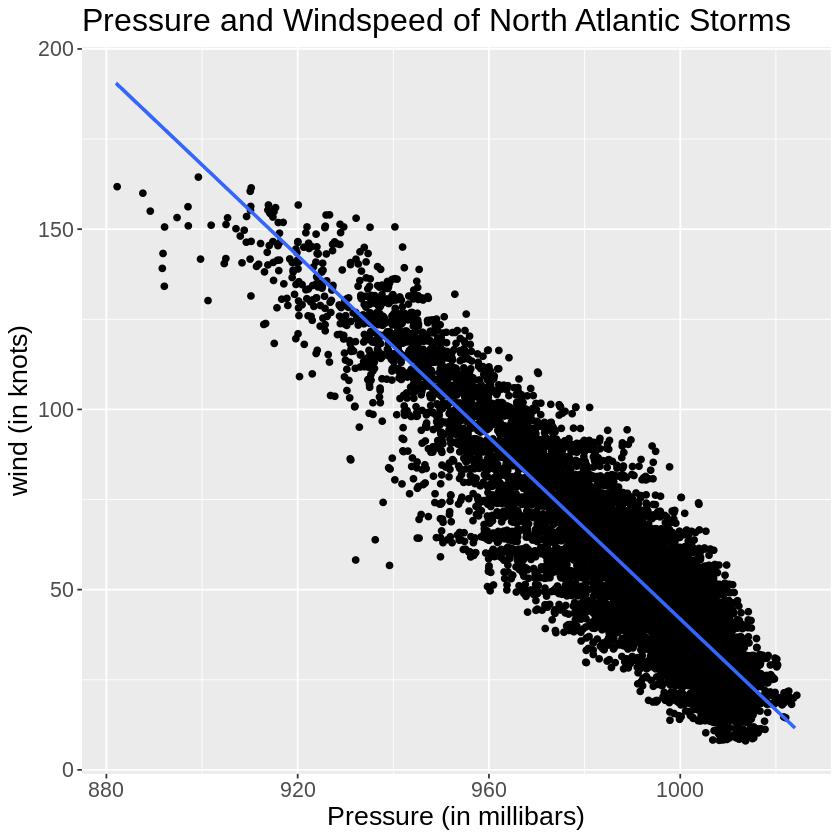

In [50]:
# exploring connection between storm wind and pressure
ggplot(storms, aes(x=pressure, y=wind)) +
  geom_point(position = "jitter") +
  geom_smooth(method = "lm") +
  labs(
    x = "Pressure (in millibars)",
    y = "wind (in knots)",
    title = "Pressure and Windspeed of North Atlantic Storms"
  ) +
    theme(text = element_text(size=16))

In [51]:
# finding coefficients for the line of best fit
lm(wind ~ pressure, data = storms)


Call:
lm(formula = wind ~ pressure, data = storms)

Coefficients:
(Intercept)     pressure  
    1301.70        -1.26  


Based on the output from the `lm()` function above, we see the line of best fit is given by

$$\widehat{\text{wind}} = 1301.7 - 1.26 \cdot \text{pressure}$$

### <a name="find-line">Finding the Line of Best Fit with Matrices</a>

---

A <font color="dodgerblue">**residual**</font> is the error of a predicted value that we calculate as difference between the predict value $\hat{y}_i$ and the actual observed value $y_i$,

$$\text{residual} = \text{error} = \epsilon_i = y_i - \hat{y}_i.$$


We want to find the values of $a$ and $b$ that minimizes error in the predictions. We have many residuals, and we do not want positive and negative errors to cancel out. Thus, one way to find the line of best fit is to minimize the sum of squares of the residuals. This can be  computed using the residual sum of squares function (or RSS):

$$
RSS(a, b) = \sum_{i=1}^n (\epsilon_i)^2 = \sum_{i=1}^n ( y_i - {\color{dodgerblue}{\hat{y}_i}})^2
= \sum_{i=1}^n \big( y_i - ({\color{dodgerblue}{a + b  x_i}}) \big)^2.
$$

We can find the values of $a$ and $b$ using matrix algebra. First, we can define a <font color="dodgerblue">**model matrix** $\mathbf{X}$</font> using the observed values $x_1$, $x_2$, $\ldots$ $x_n$ of the predictor variable $x$:

$$
\mathbf{X} =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}.
$$

Next we define a column vector $\mathbf{y}$ using the corresponding observed values of the response variable $y$:

$$
\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}.
$$

The values of $a$ and $b$ that minimize $RSS(a, b)$, which we will call $\hat{a}$ and $\hat{b}$, can be computed by minimizing the equivalent matrix equation

$$
{\color{dodgerblue}{
\begin{bmatrix}
\hat{a} \\
\hat {b}
\end{bmatrix} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}}}.$$



Thus, we can find the coefficients for the line of best fit by solving the matrix equation above.




### <a name="matrix-wind">Using Matrices to Find the Line of Best Fit for Predicting Wind Speed</a>

---


Returning to our example with the `storms` data frame, we wish to coefficients $a$ and $b$ that give the line of best

$$\widehat{\text{wind}} = a +b \cdot \text{pressure}$$

using matrices. The model matrix $\mathbf{X}$ is

$$\mathbf{X} = \begin{bmatrix}
1 & \text{pressure}_1 \\
1 & \text{pressure}_2 \\
\vdots & \vdots \\
1 & \text{pressure}_n
\end{bmatrix}$$

and the column vector of observed values of the response variable is

$$\mathbf{y} = \begin{bmatrix}
\text{wind}_1 \\
\text{wind}_2 \\
 \vdots \\
\text{wind}_n
\end{bmatrix}$$


In [52]:
X <- cbind(1, storms$pressure)
y <- storms$wind

In [53]:
X[1:5,]

1,1013
1,1013
1,1013
1,1013
1,1012


In [54]:
y[1:5]

[1] 25 25 25 25 25

The coefficients $\hat{a}$ and $\hat{b}$ for the line of best fit can thus be found using the matrices as follows:

$$
{\color{green}{\begin{bmatrix}
\hat{a} \\
\hat {b}
\end{bmatrix}}} = {\color{dodgerblue}{(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T}} {\color{tomato}{\mathbf{y}}}.$$

In [55]:
# compute (X^T X)^(-1) X^t y
XtX <- t(X) %*% X
XtX_inv <- solve(XtX)
XtX_inv %*% t(X) %*% y

1301.695398
-1.259855


In [56]:
# compute (X^T X)^(-1) X^t y
solve(t(X) %*% X) %*% t(X) %*% y

1301.695398
-1.259855


## <a name="tips">Tips for Optimizing Matrix Algebra Operations</a>

---

It is straightforward to perform matrix algebra in R. However, it is more difficult to write *efficient* (faster) matrix code. We provide
some basic tips below.



### <a name="cross">Using `crossprod()` and `tcrossprod()`</a>

---

The `crossprod()` and `tcrossprod()` functions are faster approaches to performing matrix multiplication when one of the matrices must first be transposed.

If we have matrices `A` and `B` of compatible dimensions, then:

-   `t(A) %*% B` is equivalent to `crossprod(A, B)`.
-   `A %*% t(B)` is equivalent to `tcrossprod(A, B)`.

`crossprod` and `tcrossprod` are faster than their equivalent approaches because the equivalent approaches compute the transpose of matrix in
memory before performing the multiplication. The `crossprod` and `tcrossprod` functions modify their multiplication algorithms so that the transpose matrix doesn't have to be created prior to multiplication.

To illustrate this difference, we create `A`, a $200 \times 2$ matrix of values and `B`, a $200 \times 2$ matrix of values by drawing the appropriate number of values randomly from the `storms` data frame. We use the `set.seed` function to make the example reproducible.

In [57]:
set.seed(240)  # set seed for consistent output
index <- sample(nrow(storms), 200)  # select 200 rows at random
# create random and big matrices
A <- cbind(storms$wind[index], storms$pressure[index])
B <- cbind(storms$lat[index], storms$long[index])
dim(A)
dim(B)

[1] 200   2

[1] 200   2

First, we use the `all.equal` function to confirm that the standard and
optimized approaches produce the same results. `all.equal` confirms that
the supplied objects are equal to each other.

In [58]:
all.equal(t(A) %*% B, crossprod(A, B))

[1] TRUE

In [59]:
all.equal(A %*% t(B), tcrossprod(A, B))

[1] TRUE

We will use the `microbenchmark()` function from the [`microbenchmark`](https://cran.r-project.org/web/)
package (Mersmann 2024) to time the optimized and standard approaches to
computing $\mathbf{A}^T \mathbf{B}$ and $\mathbf{A} \mathbf{B}^T$.

Be sure you have already installed and loaded the `microbenchmark` package. If not, be sure to run the [code cells](#pack) at the start of this notebook.

In [ ]:
# run only if you have not already installed and loaded microbenchmark
#install.packages("microbenchmark")
#library(microbenchmark)

In [60]:
A <- cbind(storms$wind[1:500], storms$pressure[1:500])
B <- cbind(storms$lat[1:500], storms$long[1:500])
dim(A)
dim(B)

[1] 500   2

[1] 500   2

We now compute $\mathbf{A}^T \mathbf{B}$ using the standard approach and
using `crossprod` within the `microbenchmark` function. The
`microbenchmark` function will perform each computation 100 times by
default to determine the typical speed. We then use the `plot` function
to plot the results.

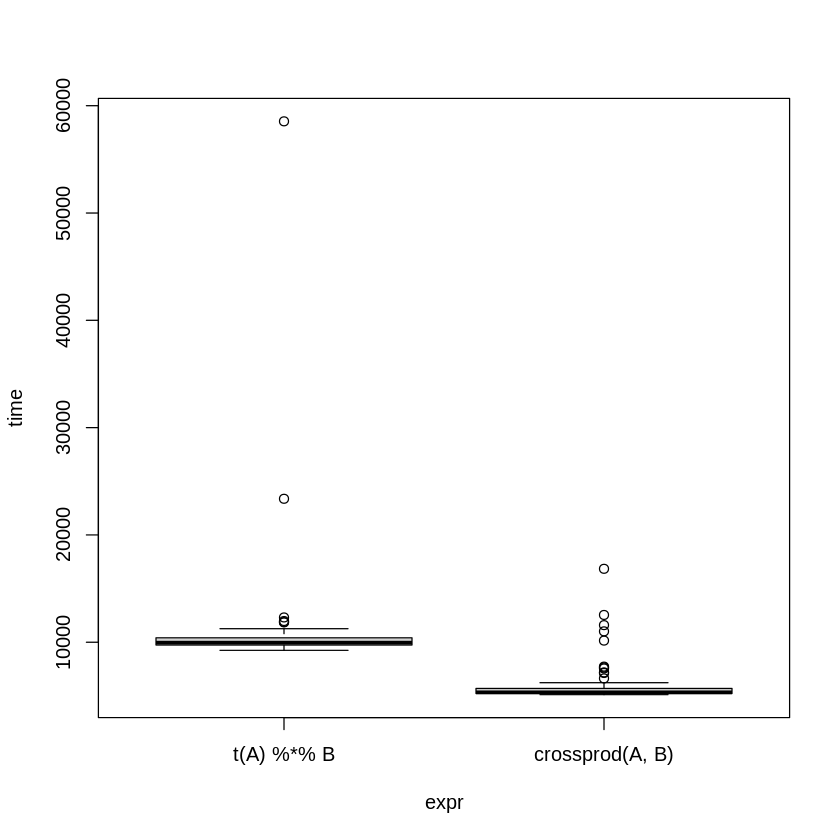

In [61]:
t1 <- microbenchmark(t(A) %*% B, crossprod(A, B))
plot(t1)
#plot(t1, ylim = c(0, 10000))

While the results shown in the above plot will depend on the speed of
the computer used to perform the calculation, the boxplot shown for
`crossprod(A, B)` should be lower then `t(A) %*% B`, which means the
`crossprod` approach is faster than the standard approach.

We perform a similar analysis for computing $\mathbf{A}\mathbf{B}^T$.

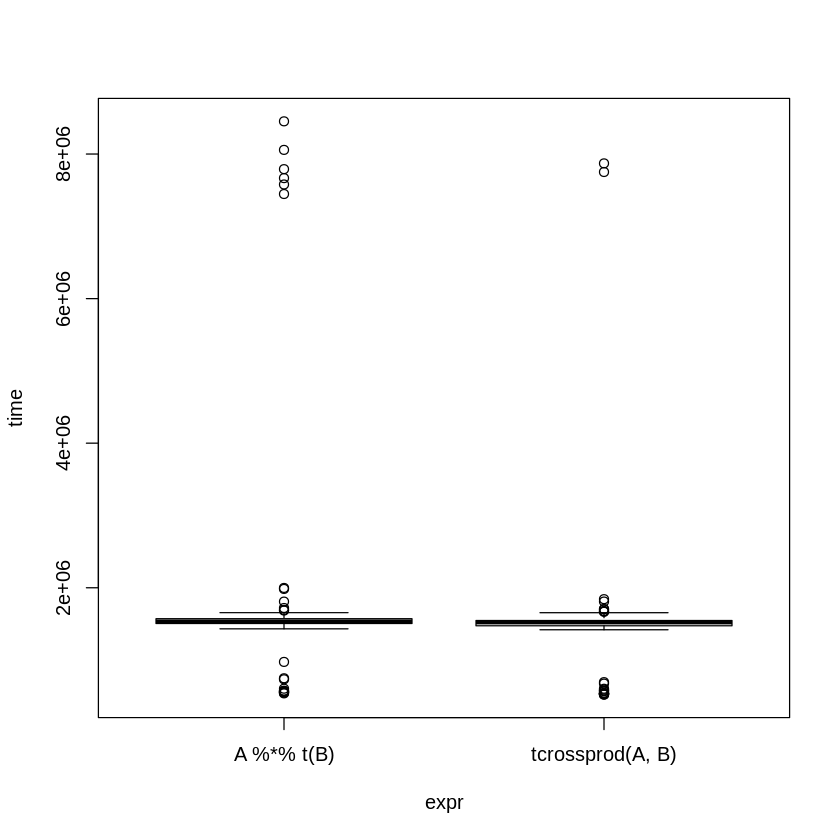

In [62]:
t2 <- microbenchmark(A %*% t(B), tcrossprod(A, B))
plot(t2)
#plot(t2, ylim = c(5000,450000))

Once again, the plot of our timing results should show that
`tcrossprod(A, B)` can be computed faster than `A %*% t(B)`.



### <a name="order">Order of matrix multiplication</a>

---

Matrix multiplication is associative, meaning that if we have compatible matrices $\mathbf{A}$, $\mathbf{B}$ and $\mathbf{C}$, then

$$(\mathbf{A B})\mathbf{C} = \mathbf{A} (\mathbf{B C}).$$

The order of matrix multiplication can greatly impact how long it takes to perform the operations.

**Prioritize performing operations that produce smaller matrices first.** Smaller can mean the total number of rows/columns or long/thin
matrices, depending on the context.

We create three matrices below filled with random values: `A` is a matrix of size $500\times 2$, `B` is a matrix of size $2 \times 50$, `C`
is a $50\times 1$ column vector.

In [63]:
set.seed(1999)
A <- matrix(rnorm(1000), ncol = 2)
B <- matrix(rnorm(100), nrow = 2)
C <- rnorm(50)

Computing $\mathbf{A}(\mathbf{BC})$ is much faster than computing
$(\mathbf{AB})\mathbf{C}$ because $\mathbf{BC}$ first produces
$2\times 1$ matrix while $\mathbf{AB}$ produces a much larger
$500 \times 50$ matrix.

We confirm this by timing these operations using the `microbenchmark`
function and plotting the results.

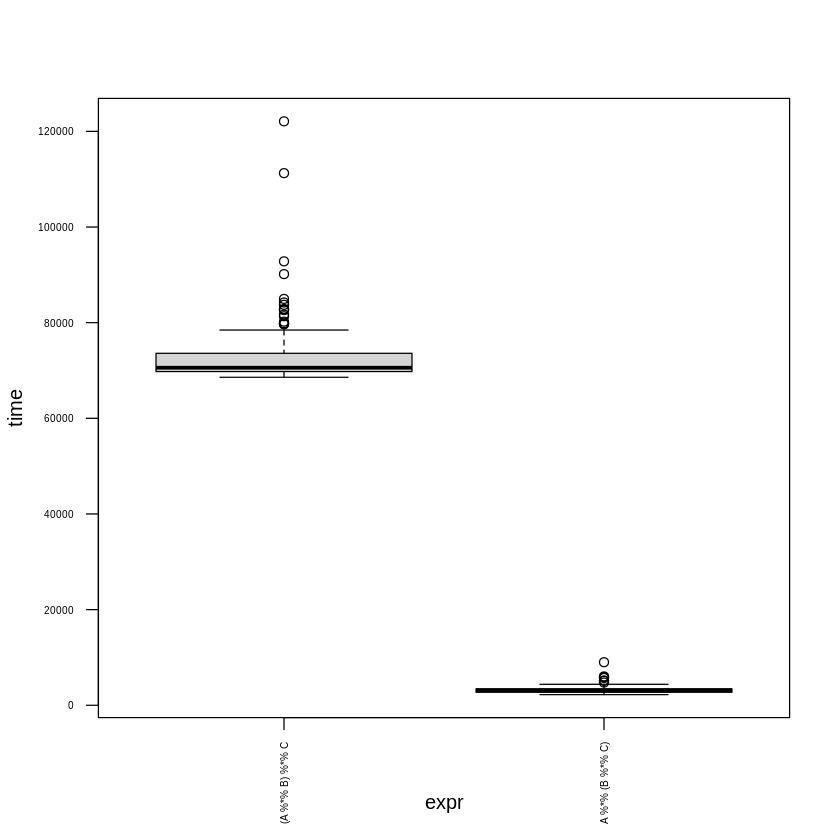

In [64]:
t3 <- microbenchmark((A %*% B) %*% C,
                     A %*% (B %*% C))
plot(t3, las = 2, cex.axis = 0.5)

# <a name="array">Arrays</a>

---

An array is a multidimensional, homogeneous (one data type) data structure.

-   Arrays can be 1, 2, 3, $\ldots$ dimensions.
-   Arrays are a generalization of a matrix.

We will discuss 3-dimensional arrays because they are the easiest to visualize.

A 3-dimensional array is like a loaf of bread.

-   Each slice of bread is a two-dimensional matrix/array.
-   We stack the matrix slices side-by-side to get the third dimension of our array.

<img src="https://images.pexels.com/photos/166021/pexels-photo-166021.jpeg" alt="Sliced bread" width="500"/>



## <a name="create-array">Creating an Array</a>

---

We can create an array in R using the `array()` function.

The two main arguments of the `array()` function are:

-   `data`: an atomic vector.
-   `dim`: a numeric vector indicating the size of each dimension.

Similar to the `matrix` function, the `array` function fills in the columns of each matrix before repeating the process for each element of the third dimension.

We create a 3-dimensional array with dimension $3\times 2 \times 4$ below.

In [65]:
A <- array(1:24, dim = c(3, 2, 4))
print(A)

, , 1

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6

, , 2

     [,1] [,2]
[1,]    7   10
[2,]    8   11
[3,]    9   12

, , 3

     [,1] [,2]
[1,]   13   16
[2,]   14   17
[3,]   15   18

, , 4

     [,1] [,2]
[1,]   19   22
[2,]   20   23
[3,]   21   24



Alternatively, we can bind matrices or arrays together using the `abind()`
function in the [`abind`](https://cran.r-project.org/web/packages/abind/index.html) package (Plate and Heiberger, 2024). This is actually a very complex function, but we illustrate its use for
creating a 3-dimensional array by binding 2-dimensional matrices.

-   Run `?abind::abind` in the Console for more details.

We installed and loaded the `abind` package in the first couple of code cells in the notebook. If you need to reinstall and load, you can use the code cell below.

In [ ]:
# run only if you have not already installed and loaded microbenchmark
#install.packages("abind")
#library(abind)

We now bind two matrices along a 3rd-dimension to create a 3-dimensional
array.

In [66]:
A <- abind(
      matrix(1:4, nrow = 2),
      matrix(5:8, nrow = 2),
      along = 3)
print(A)

, , 1

     [,1] [,2]
[1,]    1    3
[2,]    2    4

, , 2

     [,1] [,2]
[1,]    5    7
[2,]    6    8



We create a second 3-dimensional array (of size $2\times 2 \times 2$
named `B` below.

In [67]:
B <- array(9:16, dim = c(2, 2, 2))

To bind `A` and `B` together, we can use the `abind` function.

In [68]:
AB <- abind(A, B)
print(AB)

, , 1

     [,1] [,2]
[1,]    1    3
[2,]    2    4

, , 2

     [,1] [,2]
[1,]    5    7
[2,]    6    8

, , 3

     [,1] [,2]
[1,]    9   11
[2,]   10   12

, , 4

     [,1] [,2]
[1,]   13   15
[2,]   14   16



The `dim` function can be used to determine the size of an array.

In [69]:
dim(A)

[1] 2 2 2

## <a name="subset-array">Subsetting an Array</a>

---


We can subset an array using indices in much the same way as a matrix. We use the `[ ]`
operator and provide vectors indicating the desired positions in each dimension that we want to extract, with each dimension being separated
by a comma.

If `A` is an array with 3 dimensions, then we can select a rectangular subset of `A` using the syntax `A[v1, v2, v3]`, where `v1`, `v2`, and
`v3` are `numeric` vectors indicating the indices of the desired elements in each dimension, respectively, that we want to select.

We provide some examples below.

In [70]:
A <- array(1:24, dim = c(3, 2, 4))
print(A)

, , 1

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6

, , 2

     [,1] [,2]
[1,]    7   10
[2,]    8   11
[3,]    9   12

, , 3

     [,1] [,2]
[1,]   13   16
[2,]   14   17
[3,]   15   18

, , 4

     [,1] [,2]
[1,]   19   22
[2,]   20   23
[3,]   21   24



Here, we subset the first element of the first dimension of `A`. This
will run across the two elements of the second dimension of `A` and
across all 4 elements of the third dimension.

In [71]:
print(A[1, , ])

     [,1] [,2] [,3] [,4]
[1,]    1    7   13   19
[2,]    4   10   16   22


We subset the second element of the second dimension of `A`. This will
run across all 3 elements of the first dimension of `A` and across all 4
elements of the 3rd dimension.

In [72]:
print(A[, 2, ])

     [,1] [,2] [,3] [,4]
[1,]    4   10   16   22
[2,]    5   11   17   23
[3,]    6   12   18   24


We subset the second and third elements of the third dimension of `A`,
i.e., the second and third slices of the third dimension of `A`. This
will run across all 3 elements of the first dimension of `A` and across
both elements of the second dimension.

In [73]:
print(A[, , 2:3])

, , 1

     [,1] [,2]
[1,]    7   10
[2,]    8   11
[3,]    9   12

, , 2

     [,1] [,2]
[1,]   13   16
[2,]   14   17
[3,]   15   18



If we subset an array such that the subset can be thought of as a vector
(e.g., a $1\times 1 \times 4$ array is like a vector with length 4),
then R will automatically convert the subsetted object to a vector
because the `[` operator has a hidden `drop` argument that by default
coerces the result to the lowest possible dimension.

In [74]:
print(A[1, 1, ])

[1]  1  7 13 19


To avoid this behavior, we must set `drop` to `FALSE`.

In [75]:
print(A[1, 1, , drop = FALSE])

, , 1

     [,1]
[1,]    1

, , 2

     [,1]
[1,]    7

, , 3

     [,1]
[1,]   13

, , 4

     [,1]
[1,]   19



If we want to select specific *elements* of an array (and not a
rectangular subset) then we can pass a matrix indicating the elements we
want to select.

-   The number of columns of the matrix needs to match the number of
    dimensions of the array we are subsetting.
-   Each row of the matrix indicates an element we want to select.

We create an matrix, `v`, to subset the elements in positions
$(1, 1, 1)$ and $(3, 2, 4)$ of `A`.

In [76]:
v <- cbind(c(1, 3), c(1, 2), c(1, 4))
v

1,1,1
3,2,4


We now use `v` to subset these elements of `A`.

In [77]:
print(A[v])

[1]  1 24


We can use the `-` syntax we learned with `matrix` objects to subset
parts of an array that are not in certain positions, but we don’t
demonstrate its usage here.



# <a name="lists">Lists</a>

---


A list in R is a non-atomic vector.

-   It is a vector, meaning it is one-dimensional.
-   It is non-atomic, meaning it can hold data beyond the basic types
    (`character`, `integer`, `double`, `logical`, `complex`, `raw`).

Lists are commonly used in two different ways:

1.  A vector with elements of the same non-atomic type, e.g., a vector of `lm` objects from the `lm` function.
2.  A vector of elements of many different types. This is often used in objected-oriented programming in R, which we will not discuss.

We will shortly discuss the first type of list in the context of loops and apply functions, where they make more sense. For now, we focus on the second type.



## <a name="create-list">Creating a List</a>

---

A list is stored as a `list` object.

A `list` object can be created using the `list()` function. Simply pass the objects you want to include the `list` as arguments to the `list`
function.

We provide an example below. We create a list that includes a vector, a matrix, and a function.

In [78]:
list(1:10, matrix(1:10, nrow = 2), mean)

1,3,5,7,9
2,4,6,8,10


It is common to assign the elements of a list names to make them easier
to reference. To do that, we simply use the syntax `name = x` in our
list, where `name` is the name we want to give the element and `x` is
the object we are including in our list.

In [79]:
mylist <- list(a = 1:10, b = matrix(1:10, nrow = 2), f = mean)
mylist

1,3,5,7,9
2,4,6,8,10


We can create a new list by combining two or more other lists using the
`c` function.

We combine 3 simple lists below using the `c` function.

In [80]:
c(list(1, 1:2), list("a", c("a", "b")), list(TRUE, c(TRUE, FALSE)))

[[1]]
[1] 1

[[2]]
[1] 1 2

[[3]]
[1] "a"

[[4]]
[1] "a" "b"

[[5]]
[1] TRUE

[[6]]
[1]  TRUE FALSE

## <a name="subset-list">Subsetting a List</a>

---

Subsetting a list is more similar to subsetting an atomic vector than it is to subsetting a matrix or array. We create a simple 4-element list with named components below.

In [81]:
a <- list(a = 1, b = 1:2, c = 1:3, d = 1:4)

To subset elements of the list, we append `[idx]` to the end of the
list’s name, where `idx` is a vector with the indices of the elements we
want to extract or a logical vector indicating the elements we want to
extract.

In the example below, we extract the 1st and 3rd elements of `a`.

In [82]:
a[c(1, 3)]

$a
[1] 1

$c
[1] 1 2 3

In the next example, we use a logical vector to subset the 2nd and 4th
elements of `a`.

In [83]:
a[c(FALSE, TRUE, FALSE, TRUE)]

$b
[1] 1 2

$d
[1] 1 2 3 4

Since the elements of the list are named, we can also use a vector of
character strings to indicate the elements we want to subset.

We subset elements `c` and `d` below.

In [84]:
a[c("c", "d")]

$c
[1] 1 2 3

$d
[1] 1 2 3 4

If we want to extract a specific element out of our list, then we append
`[[i]]` to the list’s name, with `i` indicating the index of the element
we want to extract.

In the example below, we extract the second element of `a`. Notice that
the result is the vector `1:2`, which is what is contained in the 2nd
element of `a`.

In [85]:
a[[2]]

[1] 1 2

What is the difference between the previous result and what we get from
the following command?

In [86]:
a[2]

$b
[1] 1 2

In the former example, we extracted the object that was in the 2nd
element of `a`. In the latter example, we get a list with only one
element. The only element of this list is what was previously the 2nd
element of `a`.

For a list with named components, we can use the `$` operator to extract
a specific element.

In the code below, we extract the object in element `"c"` of `a`.

In [87]:
a$c

[1] 1 2 3

## <a name="nested-list">Nested Lists</a>

---

We can create lists of lists of lists, which create “nested” lists because the lists are nested in each other.

In that case, to subset elements of the lists, we might need to stack usage of `[]` or `[[]]` side by side to subset or extract the desired
elements.

We create a nested list below.

In [88]:
b <- list(list(1, 1:2, list(3, 3:4)), 5:7)
b

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 1 2

[[1]][[3]]
[[1]][[3]][[1]]
[1] 3

[[1]][[3]][[2]]
[1] 3 4



[[2]]
[1] 5 6 7

The first element of the top-level of the list is another list with the
second element is the vector `5:7`.

In [89]:
b[[1]]

[[1]]
[1] 1

[[2]]
[1] 1 2

[[3]]
[[3]][[1]]
[1] 3

[[3]][[2]]
[1] 3 4

In [90]:
b[[2]]

[1] 5 6 7

`b[[1]]` is a list with 3 elements: the first element is the vector `1`,
the second element is the vector `[3]`, while the third element is
another list with two elements.

We can subset the first two elements of `b[[1]]` by appending `[1:2]` to
the previous syntax.

In [91]:
b[[1]][1:2]

[[1]]
[1] 1

[[2]]
[1] 1 2

We can extract the third element of `b[[1]]` by appending `[[3]]` to the
previous syntax.

In [92]:
b[[1]][[3]]

[[1]]
[1] 3

[[2]]
[1] 3 4

We can access information contained in the 3rd element of the list contained in element of `b` in a similar way.

## <a name="CC License">Creative Commons License Information</a>
---

![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

Materials created by the [Department of Mathematical and Statistical Sciences at the University of Colorado Denver](https://github.com/CU-Denver-MathStats-OER/)
and is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/).